# CIS7031 - Programming for Data Analysis
## Assessment Title: Employment in Wales
### Submitted By: FAHAD AHMED
#### STUDENT ID: ST20173598

In [1]:
## importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn import preprocessing
from scipy.cluster import hierarchy
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import stats
import seaborn as sns

py.init_notebook_mode(connected=True)
import plotly.express as px

%matplotlib inline

## 1.Data processing

### 1.1 Download the dataset for the period 2009 – 2018 and create a dataframe that concatenates Wales (total) employment.
below code read file

In [2]:
_2009 = pd.read_excel('D:/Study/Fahad/export_2009.xlsx', skiprows=2)
_2009

,All industries,Unnamed: 1,29966500,783400,552900,1336300
0,All industries,"Agriculture, forestry and fishing",389600,25700,12000,37700
1,NaN,Production,2832800,90200,66600,156700
2,NaN,Construction,2169500,60700,35900,96600
3,NaN,"Wholesale, retail, transport, hotels and food",7899000,207700,137700,345400
4,NaN,Information and communication,1153800,12900,14900,27800
5,NaN,Finance and insurance activities,1089300,13900,19800,33800
6,NaN,Real estate activities,465500,7100,6500,13500
7,NaN,"Professional, scientific and technical activit...",4572800,72400,72500,144800
8,NaN,"Public administration, defence, education and ...",7739900,255700,160000,415600
9,NaN,Other service activities,1654600,37000,27200,64200


In [3]:
_2009.columns = ["empty", "Industry", "Uni", "West Wales", "East Wal", "2009"]
data = _2009.drop(["empty", "Uni", "West Wales", "East Wal"], axis=1)
data

,Industry,2009
0,"Agriculture, forestry and fishing",37700
1,Production,156700
2,Construction,96600
3,"Wholesale, retail, transport, hotels and food",345400
4,Information and communication,27800
5,Finance and insurance activities,33800
6,Real estate activities,13500
7,"Professional, scientific and technical activit...",144800
8,"Public administration, defence, education and ...",415600
9,Other service activities,64200


In [4]:
filename = [
    'D:/Study/Fahad/export_2009.xlsx',
    'D:/Study/Fahad/export_2010.xlsx',
    'D:/Study/Fahad/export_2011.xlsx',
    'D:/Study/Fahad/export_2012.xlsx',
    'D:/Study/Fahad/export_2013.xlsx',
    'D:/Study/Fahad/export_2014.xlsx',
    'D:/Study/Fahad/export_2015.xlsx',
    'D:/Study/Fahad/export_2016.xlsx',
    'D:/Study/Fahad/export_2017.xlsx',
    'D:/Study/Fahad/export_2018.xlsx',
]
years = ["2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018"]
for year, file in zip(years[1:], filename[1:]):
    df_ = pd.read_excel(file, skiprows=2)
    df_.columns = ["empty", "Industry", "Uni", "West Wales", "East Wal", year]
    data[year] = df_[year]
data

,Industry,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,"Agriculture, forestry and fishing",37700,38200,36100,36100,36800,42700,40700,43200,40200,41100
1,Production,156700,149800,158600,154400,164200,173300,172300,162500,165100,165700
2,Construction,96600,93200,90000,91300,89300,97000,92600,102700,90800,101800
3,"Wholesale, retail, transport, hotels and food",345400,344500,343100,347300,345100,337300,357700,360200,333500,347600
4,Information and communication,27800,27900,26400,27200,26900,35700,24000,34400,58900,31500
5,Finance and insurance activities,33800,29800,33200,31100,32400,32400,30800,31000,32100,35500
6,Real estate activities,13500,14600,17600,18800,18000,22200,19100,22700,18200,25200
7,"Professional, scientific and technical activit...",144800,145800,143600,137300,149900,152900,166200,161200,176400,187100
8,"Public administration, defence, education and ...",415600,418600,425600,421000,427000,427600,423200,418500,424500,434900
9,Other service activities,64200,68000,72400,72800,75500,73300,77200,72400,83200,81800


## The final dataframe

In [5]:
data["Industry"] = [
    "Agriculture",
    "Production",
    "Construction",
    "Retail",
    "ICT",
    "Finance",
    "Real_Estate",
    "Professional_Service",
    "Public_Adminstration ",
    "Other_Service",
]
data

,Industry,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Agriculture,37700,38200,36100,36100,36800,42700,40700,43200,40200,41100
1,Production,156700,149800,158600,154400,164200,173300,172300,162500,165100,165700
2,Construction,96600,93200,90000,91300,89300,97000,92600,102700,90800,101800
3,Retail,345400,344500,343100,347300,345100,337300,357700,360200,333500,347600
4,ICT,27800,27900,26400,27200,26900,35700,24000,34400,58900,31500
5,Finance,33800,29800,33200,31100,32400,32400,30800,31000,32100,35500
6,Real_Estate,13500,14600,17600,18800,18000,22200,19100,22700,18200,25200
7,Professional_Service,144800,145800,143600,137300,149900,152900,166200,161200,176400,187100
8,Public_Adminstration,415600,418600,425600,421000,427000,427600,423200,418500,424500,434900
9,Other_Service,64200,68000,72400,72800,75500,73300,77200,72400,83200,81800


In [6]:
cdata = data.copy()
cdata.isnull()

,Industry,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False


#### No null values found in the dataset

In [7]:
z_score = np.abs(stats.zscore(cdata.drop('Industry', axis = 1)))
np.where(z_score>3)

(array([], dtype=int64), array([], dtype=int64))

#### No outliers found in the dataset

# 2.Data analysis

## 2.1 Which industry employed highest and lowest workers over the period?

In [8]:
cdata = data.copy()
cdata.set_index("Industry")

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Industry,,,,,,,,,,
Agriculture,37700,38200,36100,36100,36800,42700,40700,43200,40200,41100
Production,156700,149800,158600,154400,164200,173300,172300,162500,165100,165700
Construction,96600,93200,90000,91300,89300,97000,92600,102700,90800,101800
Retail,345400,344500,343100,347300,345100,337300,357700,360200,333500,347600
ICT,27800,27900,26400,27200,26900,35700,24000,34400,58900,31500
Finance,33800,29800,33200,31100,32400,32400,30800,31000,32100,35500
Real_Estate,13500,14600,17600,18800,18000,22200,19100,22700,18200,25200
Professional_Service,144800,145800,143600,137300,149900,152900,166200,161200,176400,187100
Public_Adminstration,415600,418600,425600,421000,427000,427600,423200,418500,424500,434900


In [9]:
employer = []
for column in cdata["Industry"][:]:
    emp = float(cdata.loc[cdata["Industry"] == column].sum(axis=1))
    employer.append(emp)

In [10]:
cdata["employer"] = employer
cdata

,Industry,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,employer
0,Agriculture,37700,38200,36100,36100,36800,42700,40700,43200,40200,41100,392800.0
1,Production,156700,149800,158600,154400,164200,173300,172300,162500,165100,165700,1622600.0
2,Construction,96600,93200,90000,91300,89300,97000,92600,102700,90800,101800,945300.0
3,Retail,345400,344500,343100,347300,345100,337300,357700,360200,333500,347600,3461700.0
4,ICT,27800,27900,26400,27200,26900,35700,24000,34400,58900,31500,320700.0
5,Finance,33800,29800,33200,31100,32400,32400,30800,31000,32100,35500,322100.0
6,Real_Estate,13500,14600,17600,18800,18000,22200,19100,22700,18200,25200,189900.0
7,Professional_Service,144800,145800,143600,137300,149900,152900,166200,161200,176400,187100,1565200.0
8,Public_Adminstration,415600,418600,425600,421000,427000,427600,423200,418500,424500,434900,4236500.0
9,Other_Service,64200,68000,72400,72800,75500,73300,77200,72400,83200,81800,740800.0


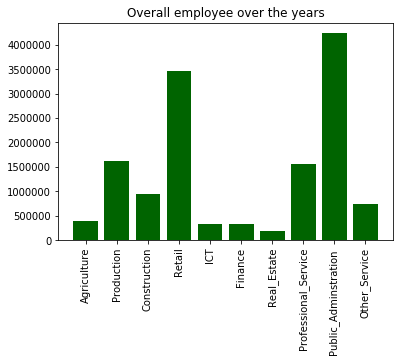

In [11]:
plt.bar(cdata['Industry'], cdata["employer"], color = "darkgreen")
plt.tick_params(axis = 'x', rotation = 90)
plt.title('Overall employee over the years')
plt.show()

#### Ans: Public Adminstration employed highest worker and Real Estate employed lowest worker over the period.

# 2.2 Which industry has the highest and lowest overall growth over the period?

In [12]:
cdata = data.copy()
cdata.set_index("Industry", inplace=True)
pct_chng = cdata.pct_change(axis=1)
pct_chng.reset_index(inplace=True)
pct_chng

,Industry,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Agriculture,NaN,0.013263,-0.054974,0.000000,0.019391,0.160326,-0.046838,0.061425,-0.069444,0.022388
1,Production,NaN,-0.044033,0.058745,-0.026482,0.063472,0.055420,-0.005770,-0.056878,0.016000,0.003634
2,Construction,NaN,-0.035197,-0.034335,0.014444,-0.021906,0.086226,-0.045361,0.109071,-0.115871,0.121145
3,Retail,NaN,-0.002606,-0.004064,0.012241,-0.006335,-0.022602,0.060480,0.006989,-0.074125,0.042279
4,ICT,NaN,0.003597,-0.053763,0.030303,-0.011029,0.327138,-0.327731,0.433333,0.712209,-0.465195
5,Finance,NaN,-0.118343,0.114094,-0.063253,0.041801,0.000000,-0.049383,0.006494,0.035484,0.105919
6,Real_Estate,NaN,0.081481,0.205479,0.068182,-0.042553,0.233333,-0.139640,0.188482,-0.198238,0.384615
7,Professional_Service,NaN,0.006906,-0.015089,-0.043872,0.091770,0.020013,0.086985,-0.030084,0.094293,0.060658
8,Public_Adminstration,NaN,0.007218,0.016722,-0.010808,0.014252,0.001405,-0.010290,-0.011106,0.014337,0.024499
9,Other_Service,NaN,0.059190,0.064706,0.005525,0.037088,-0.029139,0.053206,-0.062176,0.149171,-0.016827


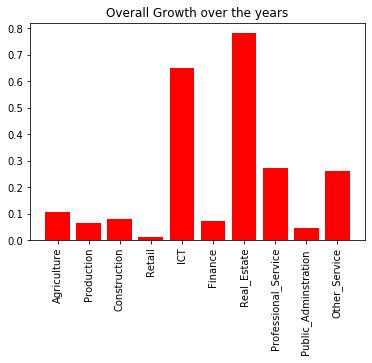

In [13]:
Sum = []
for column in pct_chng["Industry"][:]:
    sm = float(pct_chng.loc[pct_chng["Industry"] == column].sum(axis=1))
    Sum.append(sm)
pct_chng["Overall Growth"] = Sum
plt.bar(pct_chng["Industry"], pct_chng["Overall Growth"], align="center", color = 'RED')
plt.tick_params(axis = 'x', rotation = 90)
plt.title('Overall Growth over the years')
plt.show()

#### Ans: Real estate has the highest growth and retail has the lowest growth over the period.

# 2.3 Which years are the best and worst performing year in relation to number of employment. (highest and lowest employment) 

In [14]:
cdata = data.copy()
columns = cdata.columns
columns = columns[1:]
employment = [cdata[column].sum() for column in columns]

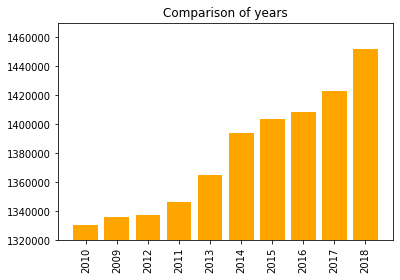

In [15]:
employment, columns = zip(*sorted(zip(employment, columns)))
dictionary = dict(zip(columns, employment))
plt.bar(columns, employment, color = 'ORANGE')
plt.tick_params(axis = 'x', rotation = 90)
plt.ylim([1320000, 1470000])
plt.title('Comparison of years')
plt.show()

#### ANS: 2010 is lowest and 2017 is highest performing year in terms of employment

# 3.Visual Analysis

## Question: Create a dynamic scatter/bubble plot showing the change of workforce number over the period using Plotly express. 

In [16]:
cdata = data.copy()
year = cdata.columns
year = year[1:].tolist()
print(year)

['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']


In [17]:
ag = []
years = []
k = 0
for i in range(len(year)):
    for j in range(len(cdata["Industry"])):
        ag.append(cdata["Industry"][k])
        years.append(int(year[j]))
    k += 1

In [18]:
rlist = []
# Iterate over each row
for i in range((cdata.shape[0])):
    row = list(cdata.iloc[i, 1:])
    for j in range(len(row)):
        rlist.append(row[j])


In [19]:
# get the list of tuples from two lists.
# and merge them by using zip().
ltuples = list(zip(ag, years, rlist))

# Assign data to tuples.
ltuples


# Converting lists of tuples into
# pandas Dataframe.
new_df = pd.DataFrame(ltuples, columns=["Industry", "Years", "Employment"])


In [20]:
fig = px.scatter(
    new_df,
    x="Years",
    y="Employment",
    animation_frame="Years",
    animation_group="Industry",
    color="Industry",
    hover_name="Employment",
    size="Employment",
    log_x=True,
    size_max=45,
    range_x=[2008, 2019],
    range_y=[0, 500000],
)
fig.show()

# 4. Correlation/ PCA

#### 4.1.Undertake a PCA (PC=2; columns should be like PC1, PC2, Industry) and produce a scatter plot.  Write your interpretation about the plot and in relation to the analysis of section 2 & 3 (for example which industries are correlated over the years as well as in PCA etc.)

In [21]:
cdata = data.copy()

features = cdata.columns[1:].tolist()
x = cdata.loc[:, features].values

In [22]:
y = cdata.loc[:, ["Industry"]].values

In [23]:
x = StandardScaler().fit_transform(x)
pd.DataFrame(data=x, columns=features).head()

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,-0.722944,-0.712345,-0.734524,-0.730311,-0.739850,-0.731262,-0.732126,-0.729848,-0.785431,-0.769321
1,0.174046,0.125885,0.178414,0.154620,0.205460,0.255949,0.234445,0.161541,0.175489,0.151322
2,-0.278972,-0.299239,-0.332831,-0.317393,-0.350299,-0.320806,-0.350933,-0.285274,-0.396139,-0.320821
3,1.596417,1.588280,1.553410,1.597587,1.547741,1.495632,1.596163,1.638720,1.471078,1.495344
4,-0.797568,-0.789708,-0.806813,-0.796886,-0.813308,-0.784175,-0.854783,-0.795600,-0.641563,-0.840254


In [24]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(
    data=principalComponents, columns=["principal component 1", "principal component 2"]
)

In [25]:
finalDf = pd.concat([principalDf, cdata[["Industry"]]], axis=1)
finalDf.head(5)

,principal component 1,principal component 2,Industry
0,-2.336228,-0.062033,Agriculture
1,0.574654,0.007002,Production
2,-1.028544,-0.068697,Construction
3,4.927032,-0.121161,Retail
4,-2.504829,0.084791,ICT


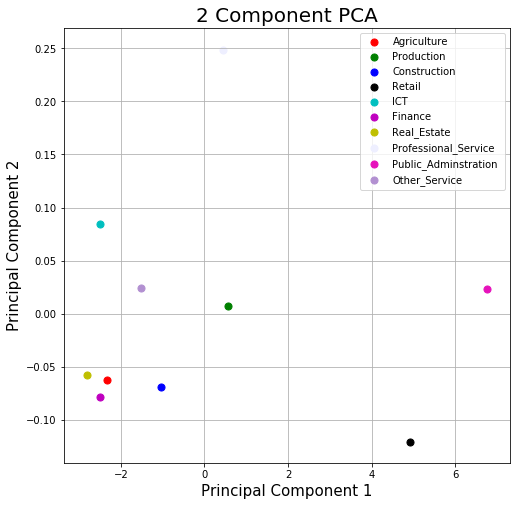

In [26]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel("Principal Component 1", fontsize=15)
ax.set_ylabel("Principal Component 2", fontsize=15)
ax.set_title("2 Component PCA", fontsize=20)
ind = data["Industry"]


targets = [
    "Agriculture",
    "Production",
    "Construction",
    "Retail",
    "ICT",
    "Finance",
    "Real_Estate",
    "Professional_Service",
    "Public_Adminstration ",
    "Other_Service",
]
colors = ["r", "g", "b", "k", "c", "m", "y", "#eeefff", "#e612bb", "#b290d1"]
for target, color in zip(targets, colors):
    indicesToKeep = finalDf["Industry"] == target
    ax.scatter(
        finalDf.loc[indicesToKeep, "principal component 1"],
        finalDf.loc[indicesToKeep, "principal component 2"],
        c=color,
        s=50,
    )

ax.legend(targets)
ax.grid()

In [27]:
finalDf

,principal component 1,principal component 2,Industry
0,-2.336228,-0.062033,Agriculture
1,0.574654,0.007002,Production
2,-1.028544,-0.068697,Construction
3,4.927032,-0.121161,Retail
4,-2.504829,0.084791,ICT
5,-2.503685,-0.078178,Finance
6,-2.816887,-0.057759,Real_Estate
7,0.438737,0.248729,Professional_Service
8,6.762305,0.023413,Public_Adminstration
9,-1.512556,0.023895,Other_Service


In [28]:
pca.explained_variance_ratio_

array([0.99808273, 0.00102919])

#### Ans: PCA analysis shows public administration is the most dominant industry and retail is the second. PCA also aligns with the behaviour of data analysis part. Here agriculture, real estate and finance are highly related.

## 4.2 Make a year wise correlation for each industry.  Does the aforementioned industries are also correlated over the years?

In [29]:
cdata = data.copy()
cdata = cdata.set_index("Industry")
cdata = cdata.T
corr_matrix = cdata.corr().abs()

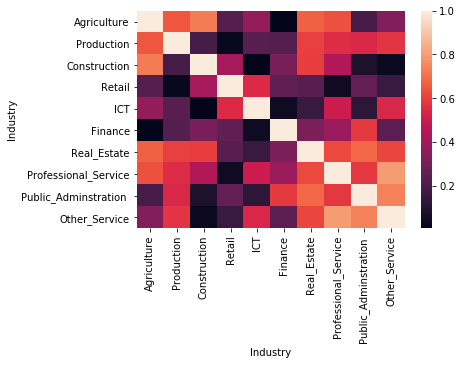

In [30]:
sns.heatmap(corr_matrix, 
        xticklabels=corr_matrix.columns,
        yticklabels=corr_matrix.columns)
plt.show()

#### Ans:Aforementioned industries are not related over the years.

# 5. Clustering (k means & hierarchical)

### 5.1 Using the best and worst performing year column’s employment data (2.3) undertake a K means clustering analysis (K=2 & 3) and identify industries cluster together.

In [31]:
cdata = data.copy()
print(cdata)
ind = cdata["Industry"]
ydata = cdata[["2010", "2018"]]
ydata = ydata.values.astype("float32", copy=False)
stscaler = preprocessing.StandardScaler().fit(ydata)
ydata = stscaler.transform(ydata)
kmeans = KMeans(n_clusters=2, max_iter=50, random_state=1)
kmeans.fit(ydata)

                Industry    2009    2010    2011    2012    2013    2014  \
0            Agriculture   37700   38200   36100   36100   36800   42700   
1             Production  156700  149800  158600  154400  164200  173300   
2           Construction   96600   93200   90000   91300   89300   97000   
3                 Retail  345400  344500  343100  347300  345100  337300   
4                    ICT   27800   27900   26400   27200   26900   35700   
5                Finance   33800   29800   33200   31100   32400   32400   
6            Real_Estate   13500   14600   17600   18800   18000   22200   
7   Professional_Service  144800  145800  143600  137300  149900  152900   
8  Public_Adminstration   415600  418600  425600  421000  427000  427600   
9          Other_Service   64200   68000   72400   72800   75500   73300   

     2015    2016    2017    2018  
0   40700   43200   40200   41100  
1  172300  162500  165100  165700  
2   92600  102700   90800  101800  
3  357700  360200  

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [32]:
k_data = pd.DataFrame(data = ydata)
k_data['Industry'] = ind.to_list()
k_data

,0,1,Industry
0,-0.712345,-0.769321,Agriculture
1,0.125885,0.151322,Production
2,-0.299239,-0.320821,Construction
3,1.588280,1.495344,Retail
4,-0.789708,-0.840254,ICT
5,-0.775438,-0.810698,Finance
6,-0.889605,-0.886803,Real_Estate
7,0.095841,0.309443,Professional_Service
8,2.144846,2.140386,Public_Adminstration
9,-0.488517,-0.468597,Other_Service


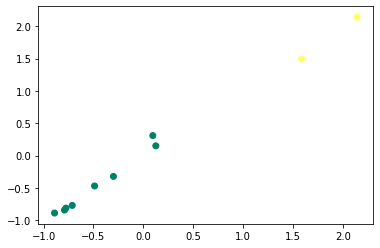

In [33]:
plt.scatter(ydata[:, 0],ydata[:, 1], c=kmeans.labels_, cmap="summer")
plt.show()

#### Ans:Here we have created two clusters. Public administration and retail are highly related in one while agriculture, ICT, real estate, construction, other service, professional service and production is related in another.

In [34]:
cdata = data.copy()
print(cdata)
ind = cdata["Industry"]
ydata = cdata[["2010", "2018"]]
ydata = ydata.values.astype("float32", copy=False)
stscaler = preprocessing.StandardScaler().fit(ydata)
ydata = stscaler.transform(ydata)
kmeans = KMeans(n_clusters=3, max_iter=50, random_state=1)
kmeans.fit(ydata)

                Industry    2009    2010    2011    2012    2013    2014  \
0            Agriculture   37700   38200   36100   36100   36800   42700   
1             Production  156700  149800  158600  154400  164200  173300   
2           Construction   96600   93200   90000   91300   89300   97000   
3                 Retail  345400  344500  343100  347300  345100  337300   
4                    ICT   27800   27900   26400   27200   26900   35700   
5                Finance   33800   29800   33200   31100   32400   32400   
6            Real_Estate   13500   14600   17600   18800   18000   22200   
7   Professional_Service  144800  145800  143600  137300  149900  152900   
8  Public_Adminstration   415600  418600  425600  421000  427000  427600   
9          Other_Service   64200   68000   72400   72800   75500   73300   

     2015    2016    2017    2018  
0   40700   43200   40200   41100  
1  172300  162500  165100  165700  
2   92600  102700   90800  101800  
3  357700  360200  

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [35]:
k_data = pd.DataFrame(data = ydata)
k_data['Industry'] = ind.to_list()
k_data

,0,1,Industry
0,-0.712345,-0.769321,Agriculture
1,0.125885,0.151322,Production
2,-0.299239,-0.320821,Construction
3,1.588280,1.495344,Retail
4,-0.789708,-0.840254,ICT
5,-0.775438,-0.810698,Finance
6,-0.889605,-0.886803,Real_Estate
7,0.095841,0.309443,Professional_Service
8,2.144846,2.140386,Public_Adminstration
9,-0.488517,-0.468597,Other_Service


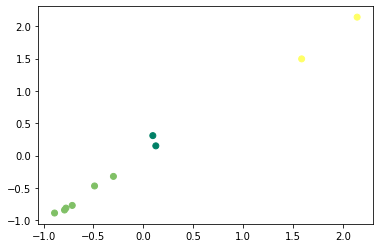

In [36]:
plt.scatter(ydata[:, 0], ydata[:, 1], c=kmeans.labels_, cmap="summer")
plt.show()

#### From three clusters public administration and retail are highly related in one and agriculture, ICT, real estate, construction and other service are related in anoter. In the middle cluster professional service and production are related.

## 5.2 Using the same dataset (best & worst performing) create a hierarchical cluster.

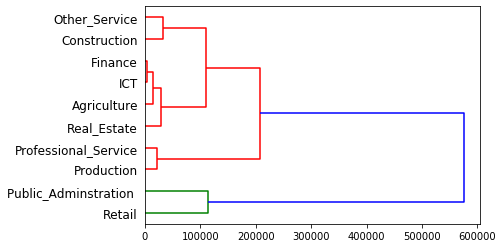

In [37]:
cdata = data.copy()
ind = cdata["Industry"]
ydata = cdata[["2010", "2018"]]
Z = hierarchy.linkage(ydata.values, "complete")
dn = hierarchy.dendrogram(Z, labels=ind.tolist(), orientation="right")

#### Hierarchical clustering is visually more appealing from k-means

# 6. Discussion

##### After data analysis I found that 
1. Public administration has employed the highest and real estate has employed the lowest over the period.
2. Real estate has the highest overall growth and retall has the lowest over the period. 
3. 2018 is the highest performing year and 2010 is the lowest performing year. 

##### PCA analysis says that 
1. First two principal components contain 99.99% of the information. 
2. The first principal component contains 99.80% of the variance 
3. The second principal component contains .01% of the variance. The other components contained the rest of the variance of the dataset. 

##### From clustering
1. Three clusters have been found from K-means.
2. In one cluster public administration and retail are highly related. 
3. Agriculture, ICT, real estate, construction in another
4. rofessional service and production are related in the other cluster.
